**Loading all Libraries**

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

**Collecting the dataset from Local**

**This dataset contains information on monthly beer production in Australia. The values ranges from 1956 to 1995.**

In [90]:
from google.colab import files
uploaded = files.upload()

Saving monthly-beer-production-in-austr.csv to monthly-beer-production-in-austr.csv


In [91]:
import io
df = pd.read_csv(io.BytesIO(uploaded['monthly-beer-production-in-austr.csv']))

In [92]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [93]:
df.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


**There are no missing values in the dataset.**

In [94]:
df.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [95]:
df.shape

(476, 2)

In [96]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


**As we can see in the below graph, it is a kind of seasonal data.**

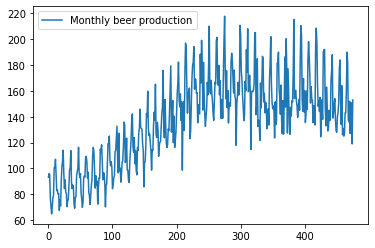

In [101]:
df.plot()

**In order to use Facebook's forecasting library (fbprophet), we need to rename columns as ds (datetime) and y (target) columns.**

In [102]:
df.columns = ['ds','y']

**Converting from Object type to datetime format**

In [103]:
df['ds'] = pd.to_datetime(df['ds'])

**Initializing the model**

In [104]:
model = Prophet()

In [105]:
df.head()

,ds,y
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [106]:
df.tail()

,ds,y
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0
475,1995-08-01,153.0


In [107]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [108]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

**Adding additional 365 dates for our prediction.**

In [109]:
future_dates = model.make_future_dataframe(periods=365)

In [110]:
future_dates.tail()

,ds
836,1996-07-27
837,1996-07-28
838,1996-07-29
839,1996-07-30
840,1996-07-31


In [111]:
prediction = model.predict(future_dates)

**"yhat" is our predicted value. Rest are related to predicted intervals**

In [112]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1956-01-01,81.890954,72.265482,97.316379,81.890954,81.890954,2.566389,2.566389,2.566389,2.566389,2.566389,2.566389,0.0,0.0,0.0,84.457343
1,1956-02-01,82.076579,66.553591,90.589937,82.076579,82.076579,-4.172474,-4.172474,-4.172474,-4.172474,-4.172474,-4.172474,0.0,0.0,0.0,77.904105
2,1956-03-01,82.250228,75.682930,99.404412,82.250228,82.250228,5.368741,5.368741,5.368741,5.368741,5.368741,5.368741,0.0,0.0,0.0,87.618970
3,1956-04-01,82.435853,63.650611,89.186376,82.435853,82.435853,-6.190705,-6.190705,-6.190705,-6.190705,-6.190705,-6.190705,0.0,0.0,0.0,76.245148
4,1956-05-01,82.615490,59.217309,83.381680,82.615490,82.615490,-11.583691,-11.583691,-11.583691,-11.583691,-11.583691,-11.583691,0.0,0.0,0.0,71.031800


Black dots are actual values and Blue line is predicted values and the blue bold line is the predicted values for our test data.

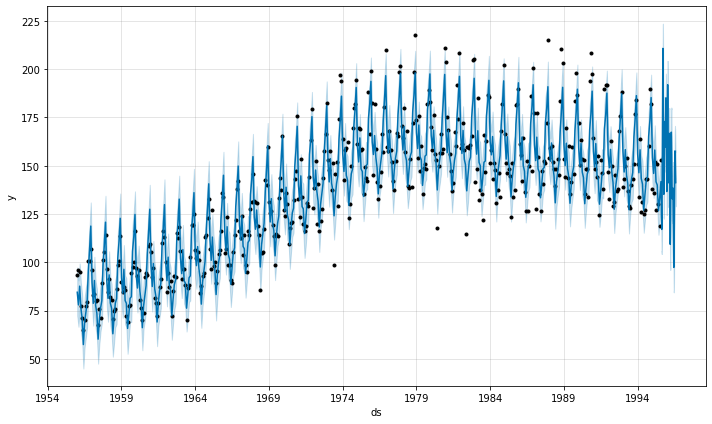

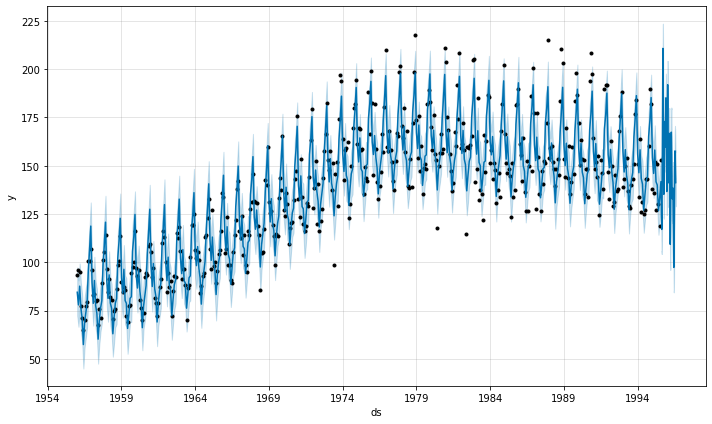

In [113]:
model.plot(prediction)

Below graph shows yearly and monthly trend of beer sales.

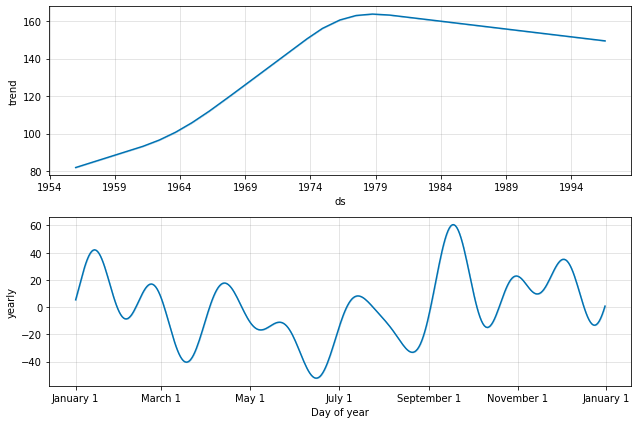

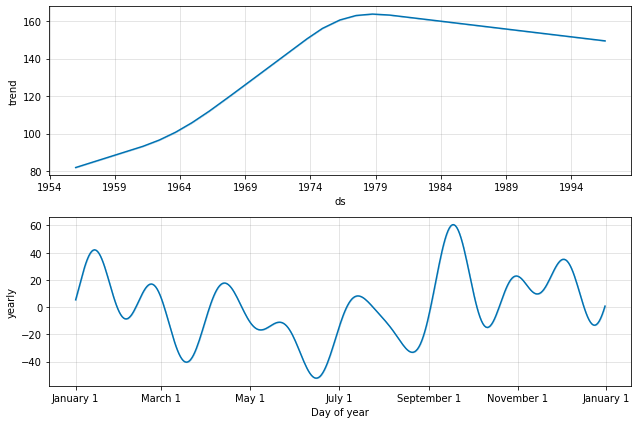

In [116]:
model.plot_components(prediction)

In [120]:
df.head()

,ds,y
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [119]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial = '730 days', period = '180 days', horizon = '365 days')
df_cv

INFO:fbprophet:Making 75 forecasts with cutoffs between 1958-02-11 00:00:00 and 1994-08-01 00:00:00


  0%|          | 0/75 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1958-03-01,69.353009,68.928331,69.790917,91.2,1958-02-11
1,1958-04-01,78.294384,77.789012,78.783465,81.9,1958-02-11
2,1958-05-01,82.324798,81.615638,83.015313,80.5,1958-02-11
3,1958-06-01,59.695919,58.704651,60.578665,70.4,1958-02-11
4,1958-07-01,68.002957,66.588506,69.244683,74.8,1958-02-11
...,...,...,...,...,...,...
893,1995-04-01,143.086155,131.145816,154.799195,127.0,1994-08-01
894,1995-05-01,139.585118,127.839432,152.686395,151.0,1994-08-01
895,1995-06-01,127.008661,114.073625,139.262146,130.0,1994-08-01
896,1995-07-01,135.097374,123.136309,146.864237,119.0,1994-08-01


**"performance_metrics" is a function in fbprophet that gives rmse value based on cross validation results.**

In [117]:
from fbprophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,128.599026,11.340151,8.656254,0.065321,0.051389,0.516854
1,38 days,126.406365,11.243059,8.469828,0.063107,0.050592,0.528090
2,39 days,124.700331,11.166930,8.340417,0.061842,0.047017,0.539326
3,40 days,130.738890,11.434111,8.571580,0.063136,0.050592,0.528090
4,41 days,130.362131,11.417624,8.515199,0.062750,0.050592,0.528090


**By plotting "rmse" values, we see that model has performed a good job in predicting because the bold line is in between the scattered values.**

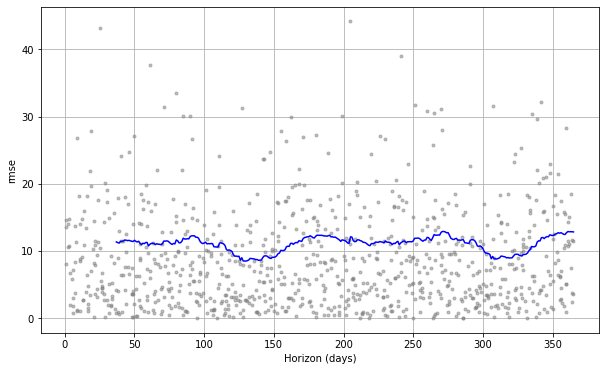

In [122]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric = 'rmse')